# Practical 3

## Aim : Applying and Demonstrating EDA and Factor Analysis on Flight Train.csv Dataset

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer

In [2]:
df=pd.read_csv(r"D:\AML\Datasets\train.csv")  #importing the dataset

In [3]:
df.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
df.isnull().sum()  #finding null values

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [6]:
df.dropna(inplace=True)  #deleting the null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Gender                             103594 non-null  object 
 3   Customer Type                      103594 non-null  object 
 4   Age                                103594 non-null  int64  
 5   Type of Travel                     103594 non-null  object 
 6   Class                              103594 non-null  object 
 7   Flight Distance                    103594 non-null  int64  
 8   Inflight wifi service              103594 non-null  int64  
 9   Departure/Arrival time convenient  103594 non-null  int64  
 10  Ease of Online booking             103594 non-null  int64  
 11  Gate location                      1035

In [8]:
from collections import Counter
print(Counter(df["satisfaction"]))

Counter({'neutral or dissatisfied': 58697, 'satisfied': 44897})


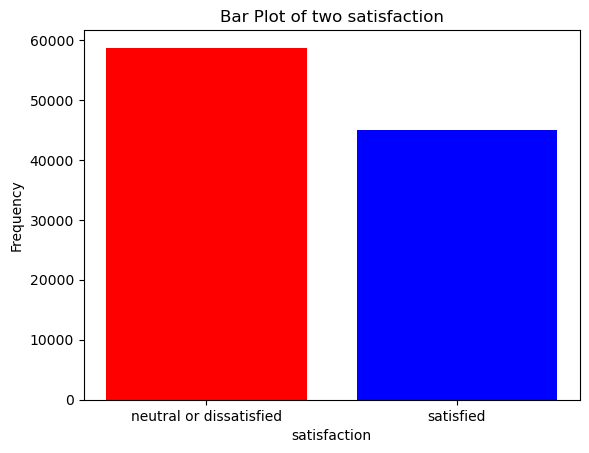

In [9]:
satisfaction_count = dict(Counter(df["satisfaction"]).most_common(2))
plt.bar(satisfaction_count.keys(), satisfaction_count.values(),color=["red","blue"])
plt.xlabel("satisfaction")
plt.ylabel("Frequency")
plt.title("Bar Plot of two satisfaction")
plt.show()

In [10]:
df.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    1035

In [12]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['satisfaction'] = le.fit_transform(df['satisfaction'])
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


In [13]:
x=df.iloc[:,[0,1,3,4]].values

In [14]:
df=pd.get_dummies(df,columns=["Gender","Customer Type","Type of Travel","Class"]) # Dropping unnecessary columns

In [15]:
df

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,0,0,1,1,0,0,1,0,0,1
1,25,235,3,2,3,3,1,3,1,1,...,0,0,1,0,1,1,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,1,1,0,1,0,1,0,1,0,0
3,25,562,2,5,5,5,2,2,2,2,...,0,1,0,1,0,1,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,...,1,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,...,0,1,0,0,1,1,0,0,1,0
103900,49,2347,4,4,4,4,2,4,5,5,...,1,0,1,1,0,1,0,1,0,0
103901,30,1995,1,1,1,3,4,1,5,4,...,0,0,1,0,1,1,0,1,0,0
103902,22,1000,1,1,1,5,1,1,1,1,...,0,1,0,0,1,1,0,0,1,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                103594 non-null  int64  
 1   Flight Distance                    103594 non-null  int64  
 2   Inflight wifi service              103594 non-null  int64  
 3   Departure/Arrival time convenient  103594 non-null  int64  
 4   Ease of Online booking             103594 non-null  int64  
 5   Gate location                      103594 non-null  int64  
 6   Food and drink                     103594 non-null  int64  
 7   Online boarding                    103594 non-null  int64  
 8   Seat comfort                       103594 non-null  int64  
 9   Inflight entertainment             103594 non-null  int64  
 10  On-board service                   103594 non-null  int64  
 11  Leg room service                   1035

In [17]:
# Adequacy Test
# Bartlett’s test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value,p_value

C:\Users\ANIKET KUMAR\anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:108: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


(inf, 0.0)

In [18]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

C:\Users\ANIKET KUMAR\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [19]:
kmo_model

0.6570411110955103

In [20]:
#Choosing the Number of Factors
fa = FactorAnalyzer()
fa.fit(df)
eigen_values, vectors=fa.get_eigenvalues()
eigen_values

array([5.08557614e+00, 3.01439967e+00, 2.35793647e+00, 2.33507400e+00,
       2.16843607e+00, 1.97035145e+00, 1.95268623e+00, 1.16415577e+00,
       1.02719809e+00, 9.75765192e-01, 8.70305583e-01, 6.97397450e-01,
       6.41217270e-01, 5.72888861e-01, 4.84855078e-01, 4.62046717e-01,
       4.35012260e-01, 3.70850410e-01, 3.62841867e-01, 3.14744859e-01,
       2.91296732e-01, 2.31709665e-01, 1.78793345e-01, 3.44608271e-02,
       1.62112823e-13, 3.24224874e-16, 4.92100357e-17, 2.11133373e-17])

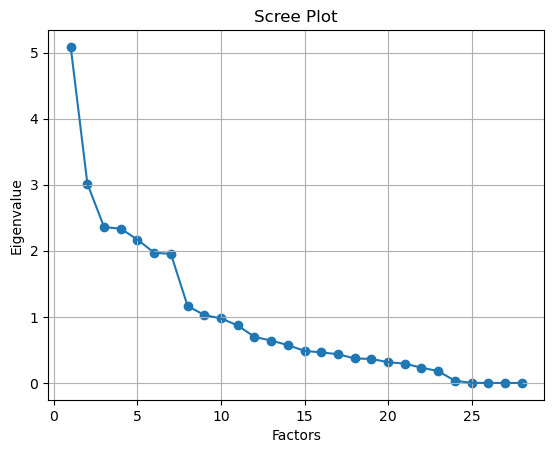

In [21]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),eigen_values)
plt.plot(range(1,df.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [22]:
fa=FactorAnalyzer(n_factors=6,rotation='varimax')
fa.fit(df)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [23]:
fa.loadings_

array([[ 1.37084521e-01,  7.26854576e-02,  2.92893075e-01,
        -1.77779547e-02,  2.52514643e-02, -8.24865659e-03],
       [ 4.32465179e-01,  5.06983109e-02,  2.56471965e-01,
         8.89391510e-02, -8.15019795e-03,  5.31268072e-03],
       [ 9.03896347e-02,  1.65967648e-01, -3.79916975e-02,
         9.65821408e-02,  7.68088598e-01, -1.38560442e-02],
       [-2.21948040e-01, -2.04457170e-02,  1.81083010e-01,
         1.00830066e-01,  5.36785465e-01,  2.34987798e-03],
       [ 1.47007246e-01, -1.17153763e-03, -3.10572374e-03,
        -1.50811378e-03,  9.08814717e-01, -4.16038994e-03],
       [-1.38836869e-02, -3.57073007e-02, -2.17685221e-02,
        -2.94641106e-02,  5.06776686e-01,  7.65492992e-03],
       [ 2.49844009e-02,  7.56775285e-01,  1.15716635e-02,
        -3.92671134e-02,  1.92397014e-02, -1.60959654e-02],
       [ 3.53425428e-01,  3.54878660e-01,  1.99784833e-01,
         6.66628914e-02,  3.50783943e-01, -1.52408203e-02],
       [ 1.71899950e-01,  7.64273846e-01,  1.478

In [24]:
factor_df=pd.DataFrame(fa.loadings_,index=df.columns)
print(factor_df)

                                          0         1         2         3  \
Age                                0.137085  0.072685  0.292893 -0.017778   
Flight Distance                    0.432465  0.050698  0.256472  0.088939   
Inflight wifi service              0.090390  0.165968 -0.037992  0.096582   
Departure/Arrival time convenient -0.221948 -0.020446  0.181083  0.100830   
Ease of Online booking             0.147007 -0.001172 -0.003106 -0.001508   
Gate location                     -0.013884 -0.035707 -0.021769 -0.029464   
Food and drink                     0.024984  0.756775  0.011572 -0.039267   
Online boarding                    0.353425  0.354879  0.199785  0.066663   
Seat comfort                       0.171900  0.764274  0.147829  0.022684   
Inflight entertainment             0.119817  0.773166  0.009629  0.396478   
On-board service                   0.116215  0.134080  0.006281  0.680274   
Leg room service                   0.185617  0.086552  0.006313  0.464697   

In [25]:
fa=FactorAnalyzer(n_factors=5,rotation='varimax')
fa.fit(df)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

In [26]:
factor_df=pd.DataFrame(fa.loadings_,index=df.columns)
print(factor_df)

                                          0         1         2         3  \
Age                                0.150799  0.031629  0.287800  0.011519   
Flight Distance                    0.446567  0.084377  0.236817 -0.013319   
Inflight wifi service              0.078617  0.229224 -0.006724  0.755818   
Departure/Arrival time convenient -0.206603  0.023475  0.208948  0.541490   
Ease of Online booking             0.147760  0.034283  0.009409  0.899619   
Gate location                     -0.011803 -0.030893 -0.012799  0.508387   
Food and drink                    -0.003692  0.584434  0.076612 -0.034148   
Online boarding                    0.343452  0.347360  0.216457  0.315276   
Seat comfort                       0.140481  0.627816  0.196796 -0.031617   
Inflight entertainment             0.071760  0.904509  0.087447 -0.016636   
On-board service                   0.113657  0.453771  0.044068  0.057924   
Leg room service                   0.179174  0.327383  0.025746  0.091147   

In [27]:
fa.get_factor_variance()

(array([3.41305127, 3.26477959, 2.53371924, 2.07586448, 1.93045931]),
 array([0.12189469, 0.11659927, 0.09048997, 0.07413802, 0.06894498]),
 array([0.12189469, 0.23849396, 0.32898393, 0.40312195, 0.47206692]))

In [28]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2         3         4
Variance          3.413051  3.264780  2.533719  2.075864  1.930459
Proportional Var  0.121895  0.116599  0.090490  0.074138  0.068945
Cumulative Var    0.121895  0.238494  0.328984  0.403122  0.472067


In [29]:
print(pd.DataFrame(fa.get_communalities(),index=df.columns,columns=['Communalities']))

                                   Communalities
Age                                     0.106755
Flight Distance                         0.262808
Inflight wifi service                   0.630088
Departure/Arrival time convenient       0.380113
Ease of Online booking                  0.832418
Gate location                           0.259776
Food and drink                          0.348784
Online boarding                         0.384881
Seat comfort                            0.453811
Inflight entertainment                  0.831404
On-board service                        0.225378
Leg room service                        0.148348
Baggage handling                        0.200525
Checkin service                         0.089762
Inflight service                        0.210844
Cleanliness                             0.503300
Departure Delay in Minutes              0.929658
Arrival Delay in Minutes                0.995049
satisfaction                            0.540690
Gender_Female       